# Conclusion run on ALLEN SMFISH with Adaptive Equilization

In [51]:
%matplotlib inline  
import matplotlib.pyplot as plt
import tables
import numpy as np
import skimage.exposure
import skimage.io
import skimage.filters

In [ ]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

# ISS DAPI MOUSE 1

In [3]:
with tables.open_file("HCA_09_ms_120_c1_stitched-1.tif.mat") as f:
    print(f)
    data = getattr(f.root, 'I').read()

HCA_09_ms_120_c1_stitched-1.tif.mat (File) ''
Last modif.: 'Fri Apr 24 16:27:47 2020'
Object Tree: 
/ (RootGroup) ''
/I (EArray(63097, 42815), zlib(3)) ''



In [42]:
print(data.shape)
print(type(data))
print(np.min(data),np.max(data))

(63097, 42815)
<class 'numpy.ndarray'>
0 11444


177 8848


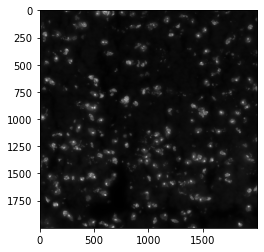

In [43]:
w, h = 2000, 2000
img = data[20000:20000+w,20000:20000+h]
print(np.min(img),np.max(img))
plt.imshow(img, cmap='gray')

287.0 8848.0
img_rescale 0 65535
img_eq 2.5e-07 1.0
img_adapteq 0.0 1.0
img_gamma2 0 1194
img_gamma05 14939 39725
1
2
3
4
5


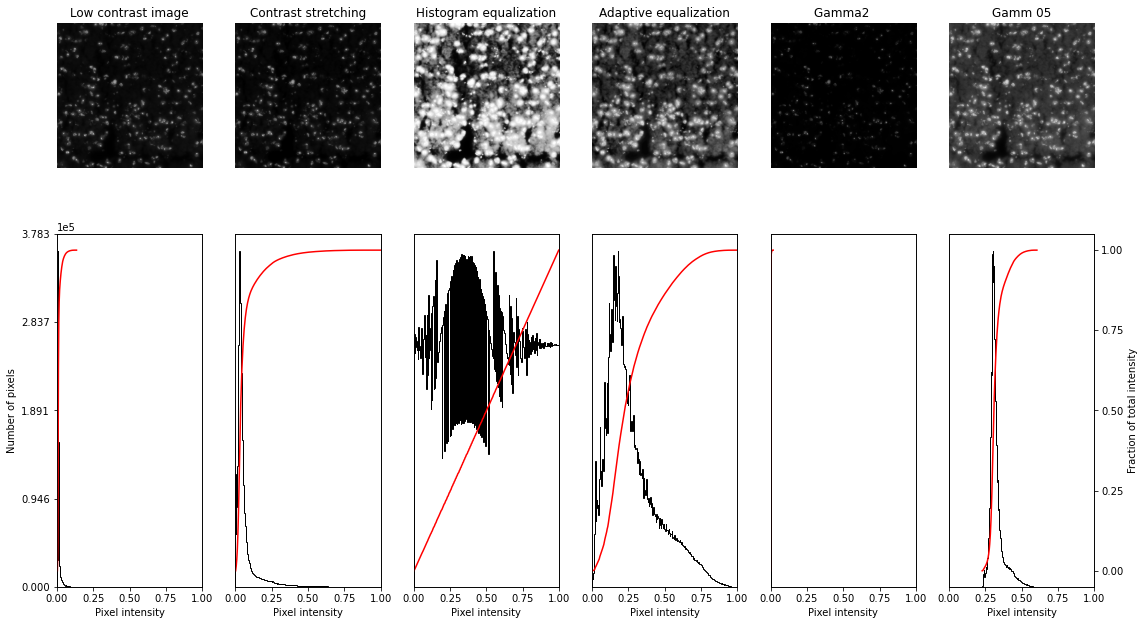

In [100]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 100))
print(p2,p98)
img_rescale = skimage.exposure.rescale_intensity(img, in_range=(p2, p98))
print("img_rescale",np.min(img_rescale),np.max(img_rescale))

# Equalization
img_eq = skimage.exposure.equalize_hist(img)
print("img_eq",np.min(img_eq),np.max(img_eq))

# Adaptive Equalization
img_adapteq = skimage.exposure.equalize_adapthist(img, clip_limit=0.03)
print("img_adapteq",np.min(img_adapteq),np.max(img_adapteq))

img_gamma2 = skimage.exposure.adjust_gamma(img, gamma=2, gain=1)
print("img_gamma2",np.min(img_gamma2),np.max(img_gamma2))

img_gamma05 = skimage.exposure.adjust_gamma(img, gamma=0.25, gain=1)
print("img_gamma05",np.min(img_gamma05),np.max(img_gamma05))


# Display results
fig = plt.figure(figsize=(16, 10))
axes = np.zeros((2, 6), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 6, 1)
for i in range(1, 6):
    print(i)
    axes[0, i] = fig.add_subplot(2, 6, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 6):
    axes[1, i] = fig.add_subplot(2, 6, 7+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')


ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_gamma2, axes[:, 4])
ax_img.set_title('Gamma2 ')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_gamma05, axes[:, 5])
ax_img.set_title('Gamm 05')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

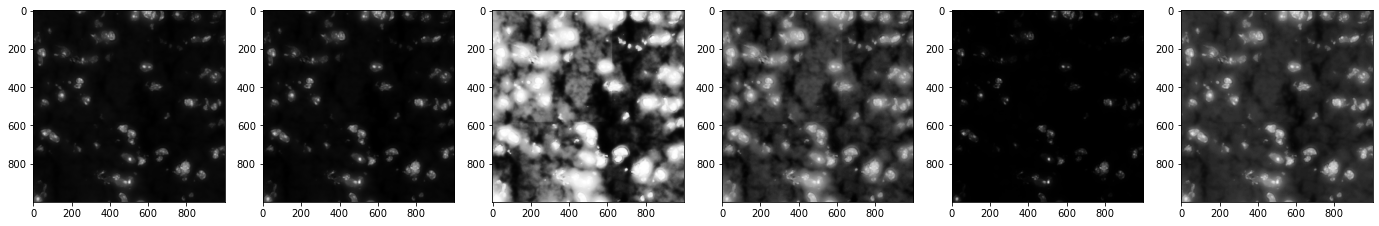

In [101]:
figure, axes = plt.subplots(ncols=6, nrows=1, figsize=(24, 6))
axes[0].imshow(img[0:1000,0:1000], cmap='gray')
axes[1].imshow(img_rescale[0:1000,0:1000], cmap='gray')
axes[2].imshow(img_eq[0:1000,0:1000], cmap='gray')
axes[3].imshow(img_adapteq[0:1000,0:1000], cmap='gray')
axes[4].imshow(img_gamma2[0:1000,0:1000], cmap='gray')
axes[5].imshow(img_gamma05[0:1000,0:1000], cmap='gray')

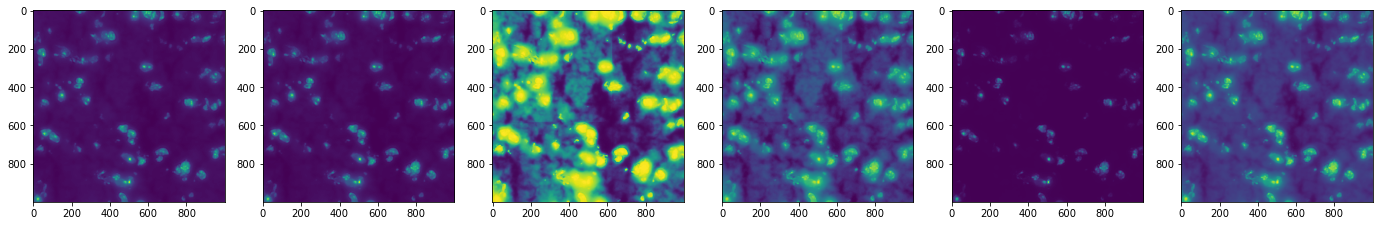

In [102]:
figure, axes = plt.subplots(ncols=6, nrows=1, figsize=(24, 6))
axes[0].imshow(img[0:1000,0:1000])
axes[1].imshow(img_rescale[0:1000,0:1000])
axes[2].imshow(img_eq[0:1000,0:1000])
axes[3].imshow(img_adapteq[0:1000,0:1000])
axes[4].imshow(img_gamma2[0:1000,0:1000])
axes[5].imshow(img_gamma05[0:1000,0:1000])

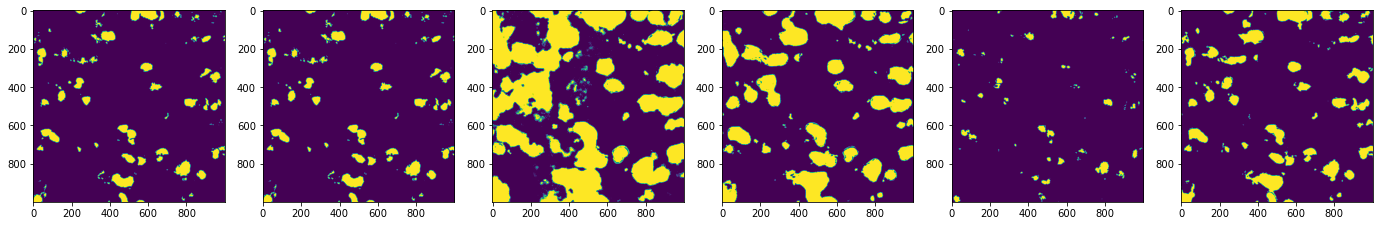

In [103]:
threshold_img = skimage.filters.threshold_otsu(img)
threshold_img_rescale = skimage.filters.threshold_otsu(img_rescale)
threshold_img_eq = skimage.filters.threshold_otsu(img_eq)
threshold_img_adapteq = skimage.filters.threshold_otsu(img_adapteq)
threshold_img_gamma2 = skimage.filters.threshold_otsu(img_gamma2)
threshold_img_gamma05 = skimage.filters.threshold_otsu(img_gamma05)

figure, axes = plt.subplots(ncols=6, nrows=1, figsize=(24, 6))
axes[0].imshow(img[0:1000,0:1000] > threshold_img)
axes[1].imshow(img_rescale[0:1000,0:1000] > threshold_img_rescale)
axes[2].imshow(img_eq[0:1000,0:1000] > threshold_img_eq)
axes[3].imshow(img_adapteq[0:1000,0:1000] > threshold_img_adapteq)
axes[4].imshow(img_gamma2[0:1000,0:1000] > threshold_img_gamma2)
axes[5].imshow(img_gamma05[0:1000,0:1000] > threshold_img_gamma05)

# allen_smfish_dapi_merged.tiff

In [38]:
data_allen = skimage.io.imread("allen_smfish_dapi_merged.tiff", as_gray=True)

In [41]:
print(type(data_allen))
print(data_allen.shape)
print(np.min(data_allen),np.max(data_allen))

<class 'numpy.ndarray'>
(23450, 21590)
0 18026


23 12964


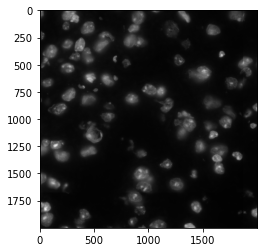

In [45]:
w, h = 2000, 2000
img_allen = data_allen[10000:10000+w,10000:10000+h]
print(np.min(img_allen),np.max(img_allen))
plt.imshow(img_allen, cmap='gray')

173.0 5660.0
img_rescale 0 65535
img_eq 2.5e-07 1.0
img_adapteq 0.0 1.0
img_gamma2 1227 29147
img_gamma05_allen 19872 51394
1
2
3
4
5


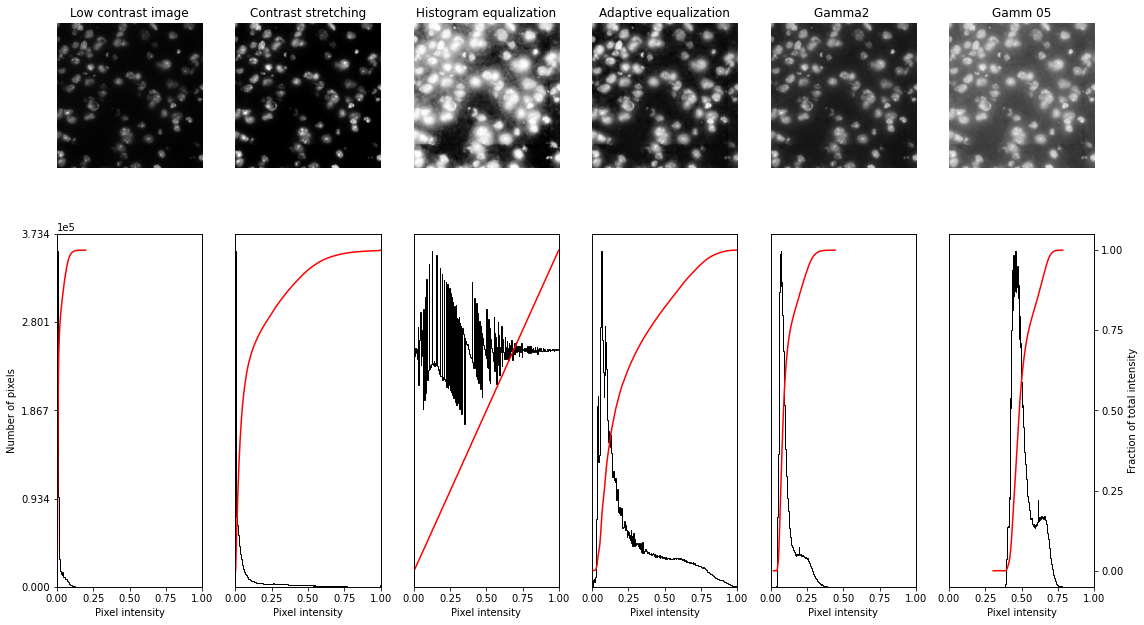

In [120]:
# Contrast stretching
p2_allen, p98_allen = np.percentile(img_allen, (2, 98))
print(p2_allen,p98_allen)
img_rescale_allen = skimage.exposure.rescale_intensity(img_allen, in_range=(p2, p98))
print("img_rescale",np.min(img_rescale_allen),np.max(img_rescale_allen))

# Equalization
img_eq_allen = skimage.exposure.equalize_hist(img_allen)
print("img_eq",np.min(img_eq_allen),np.max(img_eq_allen))

# Adaptive Equalization
img_adapteq_allen = skimage.exposure.equalize_adapthist(img_allen, clip_limit=0.03)
print("img_adapteq",np.min(img_adapteq_allen),np.max(img_adapteq_allen))

img_gamma2_allen = skimage.exposure.adjust_gamma(img_allen, gamma=0.5, gain=1)
print("img_gamma2",np.min(img_gamma2_allen),np.max(img_gamma2_allen))

img_gamma05_allen = skimage.exposure.adjust_gamma(img_allen, gamma=0.15, gain=1)
print("img_gamma05_allen",np.min(img_gamma05_allen),np.max(img_gamma05_allen))


# Display results
fig = plt.figure(figsize=(16, 10))
axes = np.zeros((2, 6), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 6, 1)
for i in range(1, 6):
    print(i)
    axes[0, i] = fig.add_subplot(2, 6, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 6):
    axes[1, i] = fig.add_subplot(2, 6, 7+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_allen, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale_allen, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq_allen, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq_allen, axes[:, 3])
ax_img.set_title('Adaptive equalization')


ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_gamma2_allen, axes[:, 4])
ax_img.set_title('Gamma2 ')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_gamma05_allen, axes[:, 5])
ax_img.set_title('Gamm 05')


ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

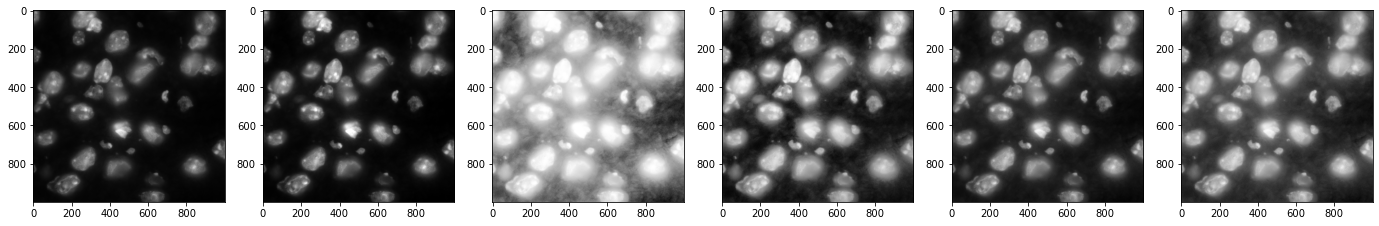

In [121]:
figure, axes = plt.subplots(ncols=6, nrows=1, figsize=(24, 6))
axes[0].imshow(img_allen[0:1000,0:1000], cmap='gray')
axes[1].imshow(img_rescale_allen[0:1000,0:1000], cmap='gray')
axes[2].imshow(img_eq_allen[0:1000,0:1000], cmap='gray')
axes[3].imshow(img_adapteq_allen[0:1000,0:1000], cmap='gray')
axes[4].imshow(img_gamma2_allen[0:1000,0:1000], cmap='gray')
axes[5].imshow(img_gamma05_allen[0:1000,0:1000], cmap='gray')

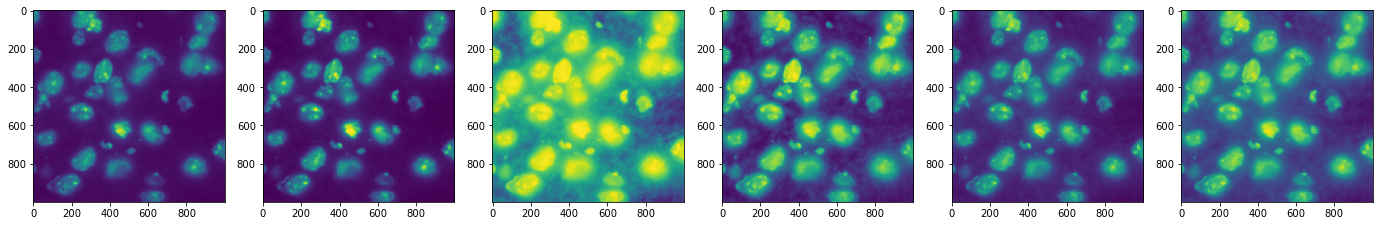

In [122]:
figure, axes = plt.subplots(ncols=6, nrows=1, figsize=(24, 6))
axes[0].imshow(img_allen[0:1000,0:1000])
axes[1].imshow(img_rescale_allen[0:1000,0:1000])
axes[2].imshow(img_eq_allen[0:1000,0:1000])
axes[3].imshow(img_adapteq_allen[0:1000,0:1000])
axes[4].imshow(img_gamma2_allen[0:1000,0:1000])
axes[5].imshow(img_gamma05_allen[0:1000,0:1000])

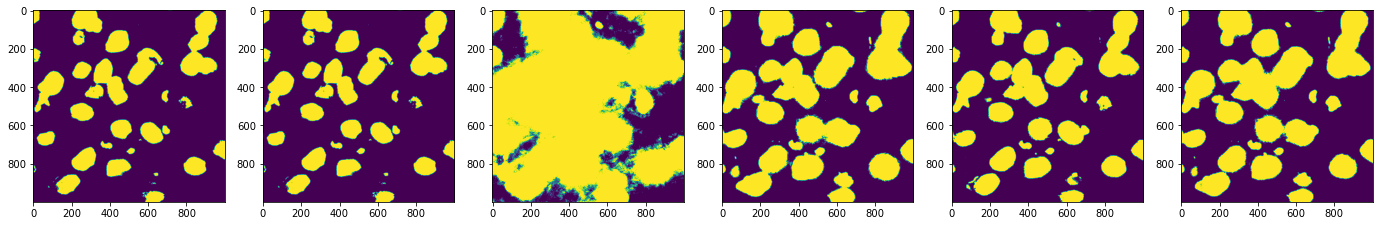

In [123]:
threshold_img_allen = skimage.filters.threshold_otsu(img_allen)
threshold_img_rescale_allen = skimage.filters.threshold_otsu(img_rescale_allen)
threshold_img_eq_allen = skimage.filters.threshold_otsu(img_eq_allen)
threshold_img_adapteq_allen = skimage.filters.threshold_otsu(img_adapteq_allen)
threshold_img_gamma2_allen = skimage.filters.threshold_otsu(img_gamma2_allen)
threshold_img_gamma05_allen = skimage.filters.threshold_otsu(img_gamma05_allen)


figure, axes = plt.subplots(ncols=6, nrows=1, figsize=(24, 6))
axes[0].imshow(img_allen[0:1000,0:1000] > threshold_img_allen)
axes[1].imshow(img_rescale_allen[0:1000,0:1000] > threshold_img_rescale_allen)
axes[2].imshow(img_eq_allen[0:1000,0:1000] > threshold_img_eq_allen)
axes[3].imshow(img_adapteq_allen[0:1000,0:1000] > threshold_img_adapteq_allen)
axes[4].imshow(img_gamma2_allen[0:1000,0:1000]> threshold_img_gamma2_allen)
axes[5].imshow(img_gamma05_allen[0:1000,0:1000]> threshold_img_gamma05_allen)